In [104]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [105]:
crop = pd.read_csv("croprec.csv")
crop.shape

(2200, 8)

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,73,57,44,20.879744,82.002744,6.502985,202.935536,rice
1,74,57,44,21.770462,80.319644,7.038096,226.655537,rice
2,92,41,38,23.004459,82.320763,7.840207,263.964248,rice
3,68,44,38,26.491096,80.158363,6.980401,242.864034,rice
4,66,36,40,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.isnull().values.any()

False

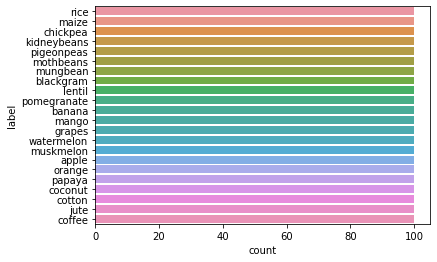

In [5]:
import seaborn as sns

sns.countplot(y='label', data=crop)

C:\Users\pabba\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


label
apple          [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
banana         [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
blackgram      [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
chickpea       [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
coconut        [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
coffee         [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
cotton         [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
grapes         [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
jute           [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
kidneybeans    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
lentil         [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
maize          [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
mango          [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
mothbeans      [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
mungbean       [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
muskmelon      [[Ax

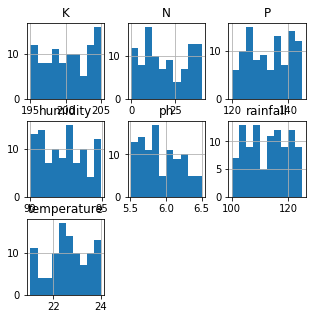

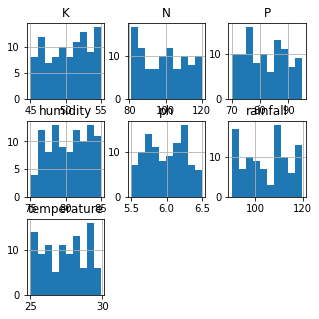

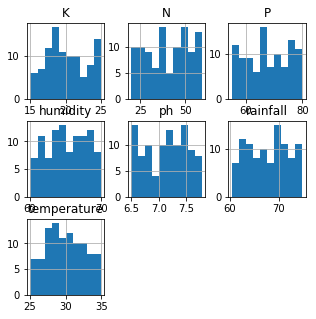

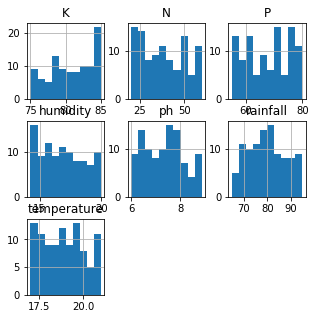

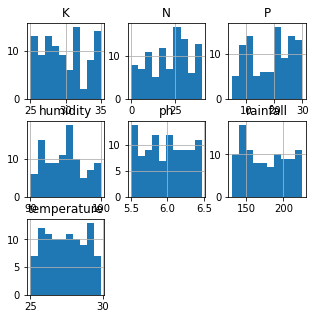

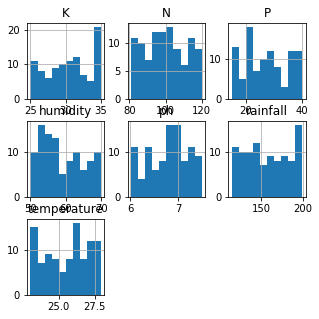

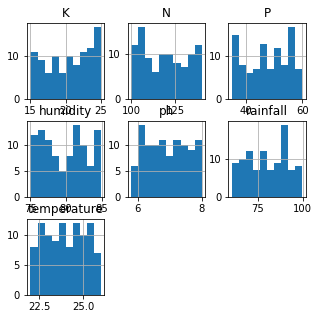

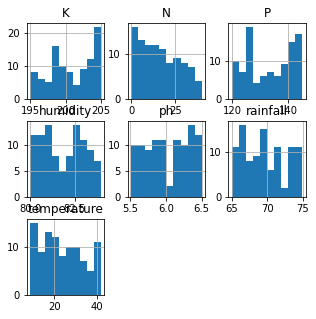

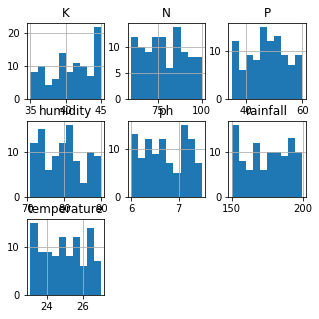

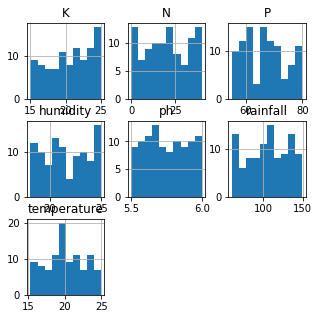

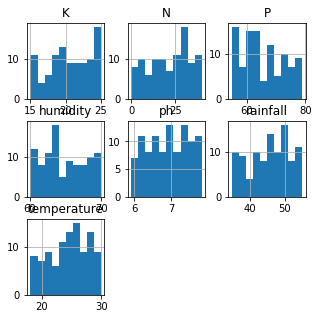

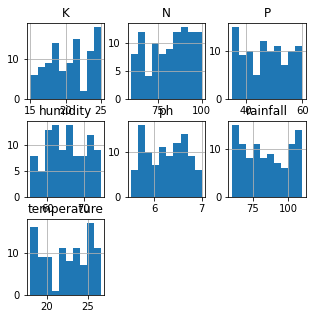

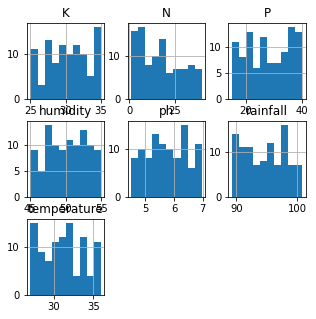

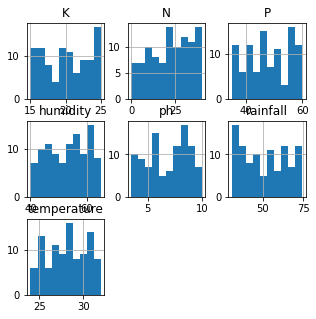

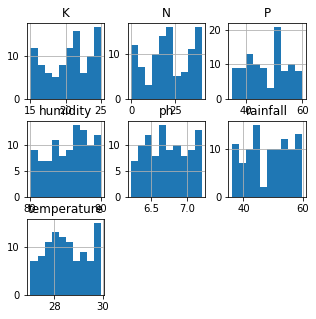

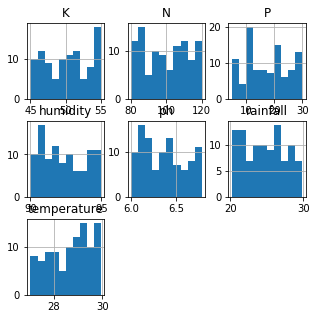

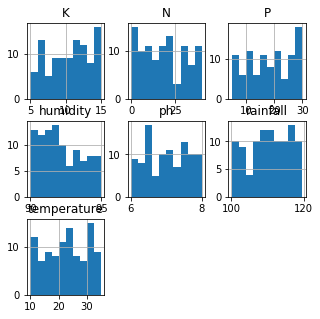

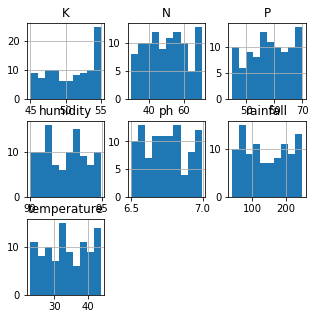

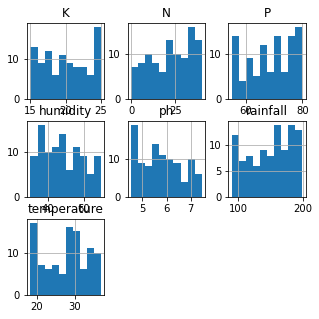

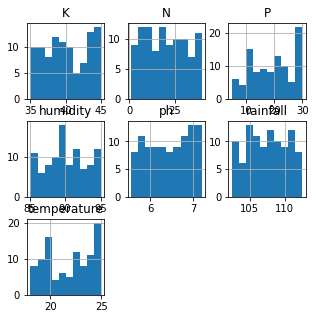

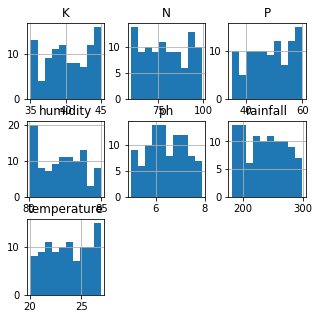

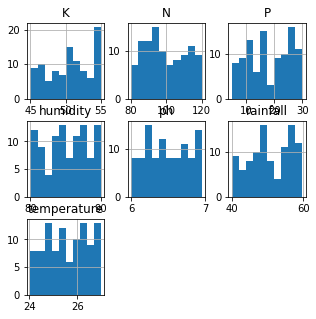

In [100]:
crop.groupby('label').hist(figsize=(5,5))

In [6]:
a=crop['label'].unique()
a

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
crop['label'].nunique()

22

In [7]:
df=crop
co=crop

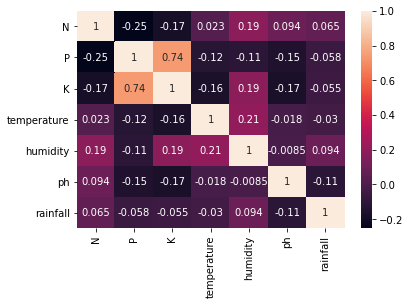

In [9]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
features1 = df[['N','P','K','temperature', 'ph', 'rainfall']]

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.30,random_state =311)

In [10]:
from sklearn.model_selection import train_test_split
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(features1,target,test_size = 0.20,random_state =311)
b=Ytrain1

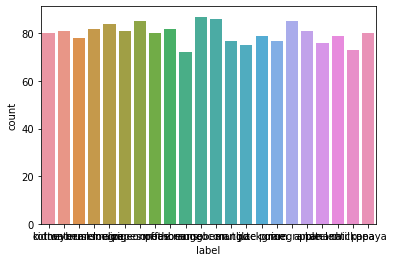

In [13]:
dataframe=pd.DataFrame(b) 
dataframe
#dataframe.reset_index()
sns.countplot(x='label',data=dataframe)
#since not equal we use F1 score 

In [5]:
X=crop.drop(['label'],axis=1)
y=crop['label']

In [20]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)

predicted_values = DecisionTree.predict(Xtrain)
x = metrics.accuracy_score(Ytrain, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)

#print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.66666666666666
DecisionTrees's Accuracy is:  93.37662337662339


In [21]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain1,Ytrain1)

predicted_values = DecisionTree.predict(Xtest1)
x = metrics.accuracy_score(Ytest1, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)

predicted_values = DecisionTree.predict(Xtrain1)
x = metrics.accuracy_score(Ytrain1, predicted_values)
print("DecisionTrees's Accuracy is: ", x*100)

#print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.68181818181819
DecisionTrees's Accuracy is:  86.30681818181817


In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
print("Naive Bayes's Accuracy is: ", x)

predicted_values = NaiveBayes.predict(Xtrain)
x = metrics.accuracy_score(Ytrain, predicted_values)
print("Naive Bayes's Accuracy is: ", x)
#print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
Naive Bayes's Accuracy is:  0.9967532467532467


In [23]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain1,Ytrain1)

predicted_values = NaiveBayes.predict(Xtest1)
x = metrics.accuracy_score(Ytest1, predicted_values)
print("Naive Bayes's Accuracy is: ", x)

predicted_values = NaiveBayes.predict(Xtrain1)
x = metrics.accuracy_score(Ytrain1, predicted_values)
print("Naive Bayes's Accuracy is: ", x)
#print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9840909090909091
Naive Bayes's Accuracy is:  0.9789772727272728


In [24]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(n_neighbors=3)

k.fit(Xtrain,Ytrain)
predicted_values = k.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
print("knn's Accuracy is: ", x)

predicted_values = k.predict(Xtrain)
x = metrics.accuracy_score(Ytrain, predicted_values)
print("knn's Accuracy is: ", x)

knn's Accuracy is:  0.9681818181818181
knn's Accuracy is:  0.9896103896103896


In [25]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(n_neighbors=3)

k.fit(Xtrain1,Ytrain1)
predicted_values = k.predict(Xtest1)
x = metrics.accuracy_score(Ytest1, predicted_values)
print("knn's Accuracy is: ", x)

predicted_values = k.predict(Xtrain1)
x = metrics.accuracy_score(Ytrain1, predicted_values)
print("knn's Accuracy is: ", x)

knn's Accuracy is:  0.9159090909090909
knn's Accuracy is:  0.9494318181818182


In [26]:
from sklearn.ensemble import VotingClassifier
em = VotingClassifier(estimators=[
       ('knn', k), ('dt',DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)), ('gnb',GaussianNB() )],
       voting='hard')
em.fit(Xtrain,Ytrain)
predicted_values = em.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
print("ensemble model's Accuracy on test dataset is: ", x)

predicted_values = em.predict(Xtrain)
x = metrics.accuracy_score(Ytrain, predicted_values)
print("ensemble model's Accuracy on train dataset is: ", x)

ensemble model's Accuracy on test dataset is:  0.9818181818181818
ensemble model's Accuracy on train dataset is:  0.9967532467532467


In [27]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(em, Xtrain1, Ytrain1, cv=9)
x = metrics.accuracy_score(Ytrain1, pred)
print("ensemble model's Accuracy with cross validation: ", x)

ensemble model's Accuracy with cross validation:  0.9443181818181818


In [28]:
from sklearn.ensemble import VotingClassifier
em = VotingClassifier(estimators=[
       ('knn', k), ('dt',DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)), ('gnb',GaussianNB() )],
       voting='hard')
em.fit(Xtrain1,Ytrain1)
predicted_values = em.predict(Xtest1)
x = metrics.accuracy_score(Ytest1, predicted_values)
print("ensemble model's Accuracy  on test dataset without humidity is: ", x)

ensemble model's Accuracy  on test dataset without humidity is:  0.95


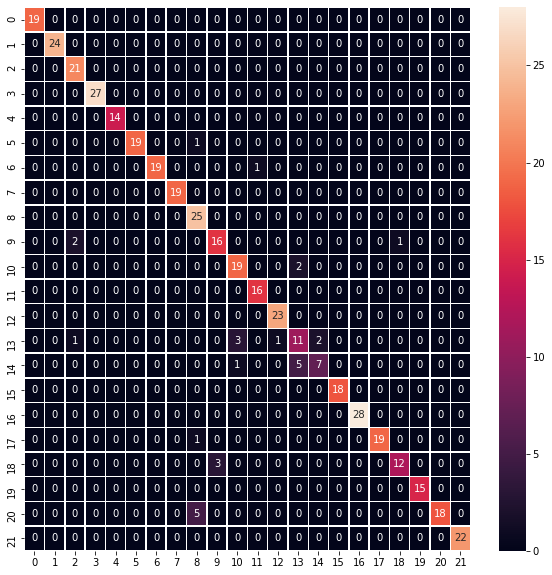

In [29]:
pred = cross_val_predict(em, Xtest1, Ytest1, cv=3)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest1, pred)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
#the

In [362]:
from sklearn.metrics import classification_report
print(classification_report(Ytest1, pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        24
   blackgram       0.88      1.00      0.93        21
    chickpea       1.00      1.00      1.00        27
     coconut       1.00      1.00      1.00        14
      coffee       1.00      0.95      0.97        20
      cotton       1.00      0.95      0.97        20
      grapes       1.00      1.00      1.00        19
        jute       0.78      1.00      0.88        25
 kidneybeans       0.84      0.84      0.84        19
      lentil       0.83      0.90      0.86        21
       maize       0.94      1.00      0.97        16
       mango       0.96      1.00      0.98        23
   mothbeans       0.61      0.61      0.61        18
    mungbean       0.78      0.54      0.64        13
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        28
      papaya       1.00    

In [25]:
b=Ytrain1

In [26]:
b=b.reset_index()
c=b['label']

In [27]:
pred

array(['coffee', 'cotton', 'blackgram', 'orange', 'rice', 'chickpea',
       'mothbeans', 'watermelon', 'jute', 'blackgram', 'kidneybeans',
       'mungbean', 'mango', 'pigeonpeas', 'banana', 'blackgram', 'coffee',
       'lentil', 'mothbeans', 'chickpea', 'maize', 'kidneybeans',
       'muskmelon', 'rice', 'rice', 'mango', 'cotton', 'grapes',
       'pigeonpeas', 'jute', 'blackgram', 'pomegranate', 'mungbean',
       'pomegranate', 'rice', 'lentil', 'pomegranate', 'coconut',
       'grapes', 'pigeonpeas', 'maize', 'banana', 'mango', 'blackgram',
       'watermelon', 'banana', 'kidneybeans', 'jute', 'banana', 'mango',
       'pomegranate', 'grapes', 'mungbean', 'kidneybeans', 'papaya',
       'maize', 'muskmelon', 'kidneybeans', 'grapes', 'lentil',
       'mungbean', 'cotton', 'kidneybeans', 'cotton', 'banana', 'papaya',
       'jute', 'chickpea', 'grapes', 'orange', 'pomegranate', 'rice',
       'orange', 'jute', 'watermelon', 'rice', 'mothbeans', 'banana',
       'maize', 'grapes', '

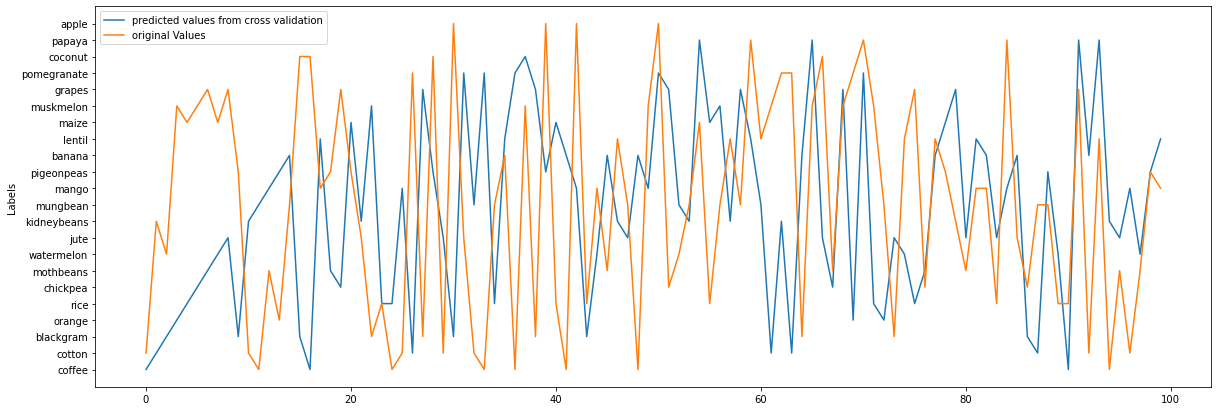

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(pred[:100], label="predicted values from cross validation")
plt.ylabel('Labels')
plt.plot(c[:100],label="original Values")
plt.legend()

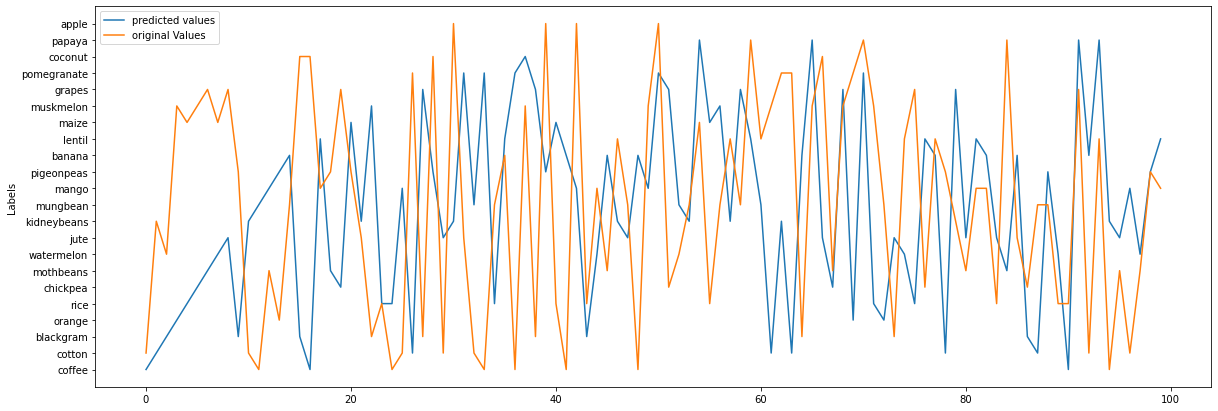

In [29]:
plt.figure(figsize=(20,7))
plt.plot(predicted_values[:100], label="predicted values")
plt.ylabel('Labels')
plt.plot(c[:100],label="original Values")
plt.legend()

ValueError: x and y must be the same size

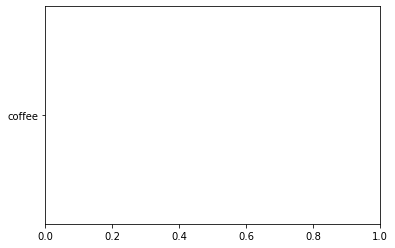

In [30]:
plt.scatter(b, pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()

In [106]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(em, Xtrain1, Ytrain1, cv=9).mean()
scores

0.9443223443223443

In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(em, Xtest1, Ytest1, cv=9).mean()
scores

0.9432161753590326

In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(em, features1,target, cv=9).mean()
scores

0.9418069960224528

In [125]:
from xgboost import XGBClassifier
xg=XGBClassifier(gamma=35,max_depth=4)
scores = cross_val_score(xg, features1,target, cv=9).mean()
scores

C:\Users\pabba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9349986989331251

In [122]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, features1,target, cv=9).mean()
scores

0.9240641611835991

In [110]:
from xgboost import XGBClassifier
xg=XGBClassifier(gamma=5)

In [111]:
xg.fit(Xtrain1,Ytrain1)

C:\Users\pabba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xg, Xtrain, Ytrain, cv=9).mean()
scores

C:\Users\pabba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9824674735935446

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xg, features1,target, cv=9).mean()
scores

C:\Users\pabba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9713672354187577

In [102]:
scores = cross_val_score(xg, Xtest1, Ytest1, cv=9).mean()
scores

C:\Users\pabba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.8863851095993953

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5,n_estimators=50,max_leaf_nodes=15)
rf.fit(Xtrain1,Ytrain1)
#scores1 = cross_val_score(rf, Xtrain1, Ytrain1, cv=9).mean()
#print(scores1)
scores = cross_val_score(rf, Xtest1, Ytest1, cv=9).mean()
print(scores)

0.9295162509448224


In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, features1,target, cv=9).mean()
scores

0.9240864651871679

In [48]:
scores1 = cross_val_score(rf, Xtrain1, Ytrain1, cv=9).mean()
print(scores1)

0.9210331996046283


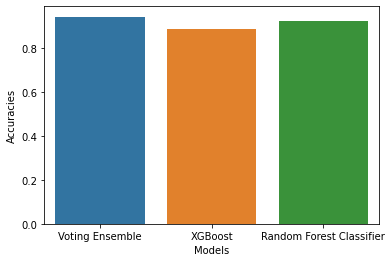

In [41]:
cars = {'Models': ['Voting Ensemble','XGBoost','Random Forest Classifier'],
        'Accuracies': [0.94321,0.88638,0.92557]
        }
df = pd.DataFrame(cars)
splot=sns.barplot(x="Models", y="Accuracies", data=df)

Text(0, 0.5, 'LifeExp')

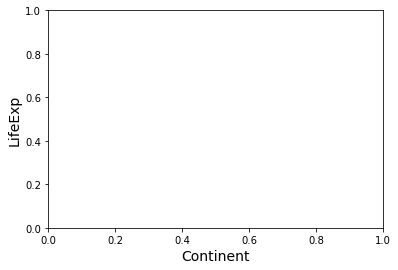

In [42]:
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Continent", size=14)
plt.ylabel("LifeExp", size=14)

In [43]:
cars = {'Models': ['KNN','Naive Bayes','Decision Tree Classifier'],
        'Accuracies': ['91.5%', '85.6%', '98.4%' ]
        }
df = pd.DataFrame(cars)
df

,Models,Accuracies
0,KNN,91.5%
1,Naive Bayes,85.6%
2,Decision Tree Classifier,98.4%


In [ ]:
#stratified havent implemented yet
import numpy as np
>>> from sklearn.model_selection import StratifiedShuffleSplit
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([0, 0, 0, 1, 1, 1])
>>> sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
>>> sss.get_n_splits(X, y)
5
>>> print(sss)
StratifiedShuffleSplit(n_splits=5, random_state=0, ...)
>>> for train_index, test_index in sss.split(X, y):
...     print("TRAIN:", train_index, "TEST:", test_index)
...     X_train, X_test = X[train_index], X[test_index]
...     y_train, y_test = y[train_index], y[test_index]